<a href="https://colab.research.google.com/github/TOTOFRIEND/181208/blob/master/zibang_model01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 구글 드라이브 연결


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
!ls -ltr /content/gdrive/

total 4
drwx------ 12 root root 4096 Jan  2 06:43 'My Drive'


In [3]:
!ls -ltr '/content/gdrive/My Drive/'

total 268727
drwx------ 2 root root      4096 May 23  2017  자료
-rw------- 1 root root   1469368 Jul  3  2017  수집시스템구성01_Spark.docx
-rw------- 1 root root    854362 Aug  6  2017  facebook_combined.txt
-rw------- 1 root root    306788 Nov  9  2017  Pandas_Class01.ipynb
-rw------- 1 root root    297863 Jan 16  2018  1_6_seaborn_titanic.ipynb
drwx------ 2 root root      4096 Feb 24  2018  세은수업
drwx------ 2 root root      4096 Mar  2  2018  설문조사
drwx------ 2 root root      4096 Mar 17  2018  스터디
-rw------- 1 root root         1 May 11  2018 '보충수업 관련 설문.gform'
-rw------- 1 root root         1 May 31  2018 'c:\DOWNLOAD 파일을.gdoc'
drwx------ 2 root root      4096 Jun 13  2018  00_빅데이터3기
drwx------ 2 root root      4096 Jun 13  2018  BigNsu
drwx------ 2 root root      4096 Aug 18 07:46  00_Tai_Lecture
drwx------ 2 root root      4096 Sep 10 14:43 '33_화이팅!!! 빅데이터 2기'
drwx------ 2 root root      4096 Sep 10 14:44  33_빅데이터2기자료
dr

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import warnings
import sklearn
import matplotlib.pylab as pylab

from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import scipy
import numpy
import json
import time
import sys
import csv
import os


In [5]:
print('matplotlib: {}'.format(mpl.__version__))
print('sklearn: {}'.format(sklearn.__version__))
print('scipy: {}'.format(scipy.__version__))
print('seaborn: {}'.format(sns.__version__))
print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))
print('Python: {}'.format(sys.version))


matplotlib: 2.1.2
sklearn: 0.20.1
scipy: 1.1.0
seaborn: 0.7.1
pandas: 0.22.0
numpy: 1.14.6
Python: 3.6.7 (default, Oct 22 2018, 11:32:17) 
[GCC 8.2.0]


In [6]:
!ls -ltr '/content/gdrive/My Drive/dataset/'

total 266678
-rw------- 1 root root     18995 Dec 18 07:32 Subways.csv
-rw------- 1 root root    631426 Dec 18 07:32 test.csv
-rw------- 1 root root     39201 Dec 18 07:32 submission.csv
-rw------- 1 root root    158232 Dec 18 07:32 Schools.csv
-rw------- 1 root root 272204642 Dec 18 07:35 train.csv
-rw------- 1 root root     23416 Dec 18 09:25 img.png


In [0]:
schools = pd.read_csv('/content/gdrive/My Drive/dataset/Schools.csv')
Subways = pd.read_csv('/content/gdrive/My Drive/dataset/Subways.csv')
test = pd.read_csv('/content/gdrive/My Drive/dataset/test.csv')

In [0]:
train = pd.read_csv('/content/gdrive/My Drive/dataset/train.csv')

## 데이터 EDA

In [9]:
print(schools.shape, Subways.shape, train.shape, test.shape)

(1921, 9) (405, 5) (1601458, 25) (3918, 25)


In [10]:
#print(train.columns)
print(test.isnull().sum())
print(train.isnull().sum())

key                                     0
apartment_id                            0
city                                    0
transaction_year_month                  0
transaction_date                        0
year_of_completion                      0
exclusive_use_area                      0
floor                                   0
latitude                                0
longitude                               0
address_by_law                          0
total_parking_capacity_in_site        371
total_household_count_in_sites          0
apartment_building_count_in_sites       0
tallest_building_in_sites               1
lowest_building_in_sites                1
heat_type                              28
heat_fuel                              48
room_id                                 0
supply_area                             0
total_household_count_of_area_type      0
room_count                              5
bathroom_count                          5
front_door_structure              

In [0]:
sns.set(style='white', context='notebook', palette='deep')
pylab.rcParams['figure.figsize'] = 12,8
warnings.filterwarnings('ignore')
mpl.style.use('ggplot')
sns.set_style('white')
%matplotlib inline


In [12]:
train.columns

Index(['key', 'apartment_id', 'city', 'transaction_year_month',
       'transaction_date', 'year_of_completion', 'exclusive_use_area', 'floor',
       'latitude', 'longitude', 'address_by_law',
       'total_parking_capacity_in_site', 'total_household_count_in_sites',
       'apartment_building_count_in_sites', 'tallest_building_in_sites',
       'lowest_building_in_sites', 'heat_type', 'heat_fuel', 'room_id',
       'supply_area', 'total_household_count_of_area_type', 'room_count',
       'bathroom_count', 'front_door_structure', 'transaction_real_price'],
      dtype='object')

In [0]:
# sel = [ 'key', 'apartment_id', 'city', 'transaction_year_month',
#        'transaction_date', 'year_of_completion', 'exclusive_use_area', 'floor',
#        'latitude', 'longitude', 'address_by_law',
#        'total_parking_capacity_in_site', 'total_household_count_in_sites',
#        'apartment_building_count_in_sites', 'tallest_building_in_sites',
#        'lowest_building_in_sites', 'heat_type', 'heat_fuel', 'room_id',
#        'supply_area', 'total_household_count_of_area_type', 'room_count',
#        'bathroom_count', 'front_door_structure', 'transaction_real_price' ]



In [0]:
# 날짜 데이터 제외
sel = [ 'key', 'apartment_id', 'city', 'transaction_year_month', 'year_of_completion', 
       'exclusive_use_area', 'floor',
       'latitude', 'longitude', 'address_by_law', 'total_household_count_in_sites',
       'apartment_building_count_in_sites', 'room_id',
       'supply_area', 'total_household_count_of_area_type', 'transaction_real_price' ]
df_train = train[sel]
df_test = test[sel]


In [14]:
print( df_train.info() )
print( df_test.info() )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601458 entries, 0 to 1601457
Data columns (total 16 columns):
key                                   1601458 non-null int64
apartment_id                          1601458 non-null int64
city                                  1601458 non-null int64
transaction_year_month                1601458 non-null int64
year_of_completion                    1601458 non-null int64
exclusive_use_area                    1601458 non-null float64
floor                                 1601458 non-null int64
latitude                              1601458 non-null float64
longitude                             1601458 non-null float64
address_by_law                        1601458 non-null int64
total_household_count_in_sites        1601458 non-null int64
apartment_building_count_in_sites     1601458 non-null int64
room_id                               1601458 non-null int64
supply_area                           1601458 non-null float64
total_household_count_of_

In [0]:
# df_train['transaction_year_month'] = pd.to_datetime(df_train, format='%d/%m/%Y')
# type(df_train['transaction_year_month'])

In [0]:
# dropna() : na가 하나라도 있는 행을 버려라. 그리고 나머지 행만 남는다.
# 1601458 => 1485957
# df_train = df_train.dropna()
# df_train.info()

In [17]:
df_train.columns

Index(['key', 'apartment_id', 'city', 'transaction_year_month',
       'year_of_completion', 'exclusive_use_area', 'floor', 'latitude',
       'longitude', 'address_by_law', 'total_household_count_in_sites',
       'apartment_building_count_in_sites', 'room_id', 'supply_area',
       'total_household_count_of_area_type', 'transaction_real_price'],
      dtype='object')

In [18]:
start =time.time()
start
end = time.time() -start
end

9.226799011230469e-05

### 상관관계 확인

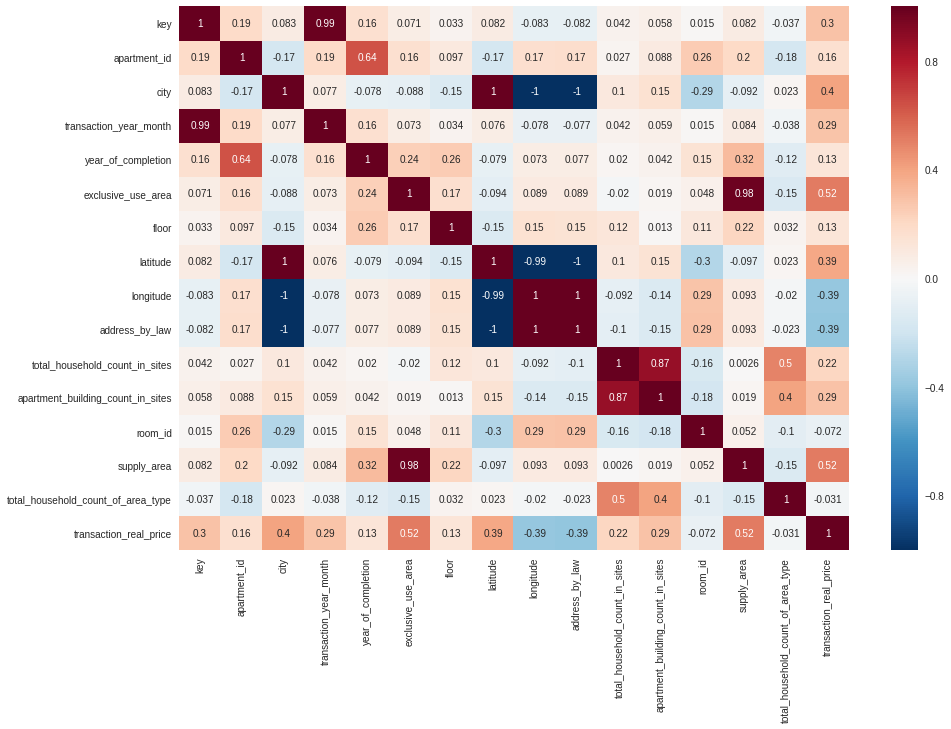

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(df_train.corr(), annot=True)
plt.show()

### feature 선택

In [20]:
df_train.columns

Index(['key', 'apartment_id', 'city', 'transaction_year_month',
       'year_of_completion', 'exclusive_use_area', 'floor', 'latitude',
       'longitude', 'address_by_law', 'total_household_count_in_sites',
       'apartment_building_count_in_sites', 'room_id', 'supply_area',
       'total_household_count_of_area_type', 'transaction_real_price'],
      dtype='object')

In [0]:
feature_names = [ 'key', 'apartment_id', 'city', 'transaction_year_month', 'year_of_completion',
       'exclusive_use_area', 'floor', 'latitude',
       'longitude', 'address_by_law', 'total_household_count_in_sites',
       'apartment_building_count_in_sites', 'supply_area']
X_train = df_train[feature_names]

In [0]:
label_name = 'transaction_real_price'
y_train = df_train[label_name]
X_test = df_test[feature_names]

In [23]:
from sklearn.ensemble import RandomForestRegressor

seed = 37
model = RandomForestRegressor(n_jobs= -1, random_state=seed)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
           oob_score=False, random_state=37, verbose=0, warm_start=False)

In [24]:
model.fit(X_train, y_train)   # 모델 fitting

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=37, verbose=0, warm_start=False)

In [0]:
from sklearn.model_selection import cross_val_score

# y_train에 log을 씌움
score = cross_val_score(model, X_train, y_train, cv=5, scoring="neg_mean_squared_error").mean()

In [0]:
score

In [0]:
df_test.columns

In [0]:
#set ids as PassengerId and predict survival 
ids = df_test['transaction_real_price']
predictions = model.predict(df_test)

#set the output as a dataframe and convert to csv file named submission.csv
sub = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
sub.to_csv('multimodel_randomF_01.csv', index=False)